In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier#KNN分类器
from sklearn.model_selection import cross_val_score#k折交叉验证

In [14]:
#AF_和nonAF_的源数据
AF_data_frame=pd.read_excel('RR_seg_AF.xls',sheet_name='Sheet1')
nonAF_data_frame=pd.read_excel('RR_seg_nonAF.xls',sheet_name='Sheet1')
AF_data0=AF_data_frame.to_numpy()
nonAF_data0=nonAF_data_frame.to_numpy()
print(AF_data.shape,nonAF_data.shape)

(17246, 30) (23236, 30)


In [3]:
AF_data.shape

(17246, 30)

0.7140690023008658
0.7445022779254528
0.7642145513409352
0.7794805566103766
0.7890405587384578
0.7946972889904989


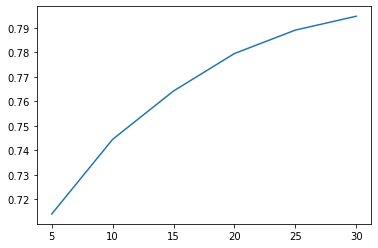

In [20]:
###对30个RR属性列 进行PCA
acc_list=[]
for i in range(5,31,5):
    pca=PCA(n_components=i,svd_solver='full')
    pca.fit(AF_data0)
    AF_data=pca.transform(AF_data0)

    pca=PCA(n_components=i,svd_solver='full')
    pca.fit(nonAF_data0)
    nonAF_data=pca.transform(nonAF_data0)

    AF_input=np.empty([AF_data.shape[0],8])
    AF_input[:,0]=np.mean(AF_data,axis=1)#均值
    AF_input[:,1]=np.std(AF_data,axis=1)#标准差
    AF_input[:,2]=np.amin(AF_data,axis=1)#最小值
    AF_input[:,3]=np.amax(AF_data,axis=1)#最大值
    AF_input[:,4]=np.ptp(AF_data,axis=1)#范围
    AF_input[:,5]=np.median(AF_data,axis=1)#中值
    AF_input[:,6]=np.var(AF_data,axis=1)#方差
    AF_input[:,7]=np.log(2*math.pi*math.e*np.var(AF_data,axis=1))#熵
    nonAF_input=np.empty([nonAF_data.shape[0],8])
    nonAF_input[:,0]=np.mean(nonAF_data,axis=1)#均值
    nonAF_input[:,1]=np.std(nonAF_data,axis=1)#标准差
    nonAF_input[:,2]=np.amin(nonAF_data,axis=1)#最小值
    nonAF_input[:,3]=np.amax(nonAF_data,axis=1)#最大值
    nonAF_input[:,4]=np.ptp(nonAF_data,axis=1)#范围
    nonAF_input[:,5]=np.median(nonAF_data,axis=1)#中值
    nonAF_input[:,6]=np.var(nonAF_data,axis=1)#方差
    nonAF_input[:,7]=np.log(2*math.pi*math.e*np.var(nonAF_data,axis=1))#熵
    raw_x=np.concatenate([AF_input,nonAF_input])#数据集x
    raw_y=np.concatenate([AF_label[0:],nonAF_label[0:]])#标签y
    
    k=10
    m=100#p值的方位
    m_min=10
    m_max=10
    m_interval=10
    index=np.array(range(m_min,m_max+1,m_interval))#第几次的实验序号
    for i in range(m_min,m_max+1,m_interval):#要保持x和y的维度一样
        model=KNeighborsClassifier(n_neighbors=i,weights='uniform',p=2)
        acc=cross_val_score(model,raw_x,raw_y,cv=k,scoring='accuracy')
        mean_acc=np.array(acc).mean()
        print(mean_acc)
        acc_list.append(mean_acc)
index=[5,10,15,20,25,30]
plt.plot(index,np.array(acc_list))

In [19]:
acc_list

[0.7140690023008658,
 0.7445022779254528,
 0.7642145513409352,
 0.7794805566103766,
 0.7890405587384578,
 0.7946972889904989]

In [5]:
###最新的特种工程，特征属性加到十列，样本的属性有均值，标准差，最小值，最大值，范围，中值，方差，熵
AF_input=np.empty([AF_data.shape[0],8])
AF_input[:,0]=np.mean(AF_data,axis=1)#均值
AF_input[:,1]=np.std(AF_data,axis=1)#标准差
AF_input[:,2]=np.amin(AF_data,axis=1)#最小值
AF_input[:,3]=np.amax(AF_data,axis=1)#最大值
AF_input[:,4]=np.ptp(AF_data,axis=1)#范围
AF_input[:,5]=np.median(AF_data,axis=1)#中值
AF_input[:,6]=np.var(AF_data,axis=1)#方差
AF_input[:,7]=np.log(2*math.pi*math.e*np.var(AF_data,axis=1))#熵
#AF_input[:,8]=np.std(AF_data,axis=1)#方差
#AF_input[:,9]=np.std(AF_data,axis=1)#方差
nonAF_input=np.empty([nonAF_data.shape[0],8])
nonAF_input[:,0]=np.mean(nonAF_data,axis=1)#均值
nonAF_input[:,1]=np.std(nonAF_data,axis=1)#标准差
nonAF_input[:,2]=np.amin(nonAF_data,axis=1)#最小值
nonAF_input[:,3]=np.amax(nonAF_data,axis=1)#最大值
nonAF_input[:,4]=np.ptp(nonAF_data,axis=1)#范围
nonAF_input[:,5]=np.median(nonAF_data,axis=1)#中值
nonAF_input[:,6]=np.var(nonAF_data,axis=1)#方差
nonAF_input[:,7]=np.log(2*math.pi*math.e*np.var(nonAF_data,axis=1))#熵
print(AF_input,nonAF_input)

[[ 6.09262499e+00  3.96701286e+01 -5.00333918e+01 ... -1.27310642e+00
   1.57371911e+03  1.01990740e+01]
 [ 1.43793031e+01  5.72238256e+01 -6.36126593e+01 ...  1.35999305e+01
   3.27456621e+03  1.09318178e+01]
 [ 1.86726508e+01  6.14481361e+01 -7.16409687e+01 ...  1.09902414e+01
   3.77587343e+03  1.10742641e+01]
 ...
 [ 1.93429913e+01  1.47888654e+02 -2.94170133e+02 ... -2.59870484e+00
   2.18710540e+04  1.28307964e+01]
 [-1.72197108e+01  8.04677007e+01 -4.23731495e+02 ...  2.63097204e-01
   6.47505086e+03  1.16135888e+01]
 [-1.92998813e+00  7.84846506e+01 -3.74813214e+02 ...  7.62255927e+00
   6.15984039e+03  1.15636832e+01]] [[ 1.84069014e+01  8.79291657e+01 -1.31670839e+01 ... -9.29208716e-01
   7.73153818e+03  1.17909402e+01]
 [ 1.68329681e+01  8.83060975e+01 -1.21758217e+01 ... -2.31733495e+00
   7.79796686e+03  1.17994954e+01]
 [ 1.81501719e+01  8.58752598e+01 -1.54628033e+01 ...  1.98347563e+00
   7.37456024e+03  1.17436686e+01]
 ...
 [ 2.62215241e+01  1.26866703e+02 -1.2408671

In [6]:
AF_label=np.ones(AF_input.shape[0])
nonAF_label=np.zeros(nonAF_input.shape[0])
print(AF_label.shape,nonAF_label.shape)

(17246,) (23236,)


0.8207095796356295
0.8268853408395378
0.8250572470926798
0.8240195695614101
0.8235748811251888
0.8226362130599758
0.8217715275425446
0.8199929324275648
0.8193012328228215
0.8183872195057191
0.8177695817637108
0.8171273075770429
0.8169296608150942
0.8158180678486954
0.8146323154011579
0.8139159366437037
0.8127548633488775
0.8121867425421978
0.811198600249708
0.8107539240157868


(10.0, 201.0)

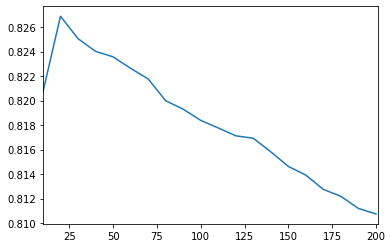

In [7]:
raw_x=np.concatenate([AF_input,nonAF_input])#数据集x
raw_y=np.concatenate([AF_label[0:],nonAF_label[0:]])#标签y
acc_list=[]
ss=StandardScaler()
raw_x=ss.fit_transform(raw_x)
k=10
m=4760#p值的方位
m_min=10
m_max=200
m_interval=10
index=np.array(range(m_min,m_max+1,m_interval))#第几次的实验序号
for i in range(m_min,m_max+1,m_interval):#要保持x和y的维度一样
    model=KNeighborsClassifier(n_neighbors=i,weights='uniform',p=2)
    acc=cross_val_score(model,raw_x,raw_y,cv=k,scoring='accuracy')
    mean_acc=np.array(acc).mean()
    print(mean_acc)
    acc_list.append(mean_acc)
plt.plot(index,np.array(acc_list))
plt.xlim(m_min,m_max+1)

In [33]:
#由numpy的ndarry格式转换为pandas的data_frame格式，用于存储
AF_input_frame=pd.DataFrame(AF_input)
nonAF_input_frame=pd.DataFrame(nonAF_input)
AF_label_frame=pd.DataFrame(AF_label)
nonAF_label_frame=pd.DataFrame(nonAF_label)

#使用with上下文管理器进行文件处理
with pd.ExcelWriter('PCA_pre_treatment_data.xlsx')as f:
    #header=False表示无列标签，index=False表示无行标签
    AF_input_frame.to_excel(f,sheet_name='AF_input',header=False,index=False)
    nonAF_input_frame.to_excel(f,sheet_name='nonAF_input',header=False,index=False)
    AF_label_frame.to_excel(f,sheet_name='AF_label',header=False,index=False)
    nonAF_label_frame.to_excel(f,sheet_name='nonAF_label',header=False,index=False)